# Data Preprocessing

In [1]:
import cv2
import os

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd

In [2]:
image_dir = '../data/raw/'
img = cv2.imread(image_dir + 'IMG_6828.png')

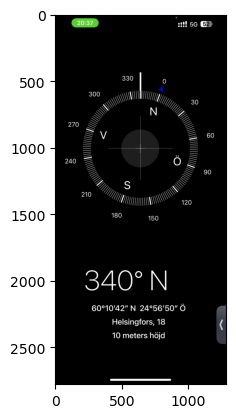

In [3]:
plt.imshow(img)
plt.show()

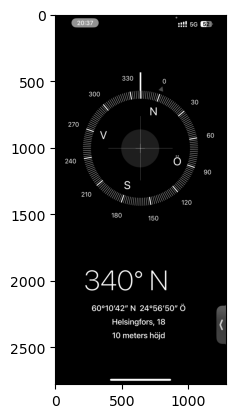

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

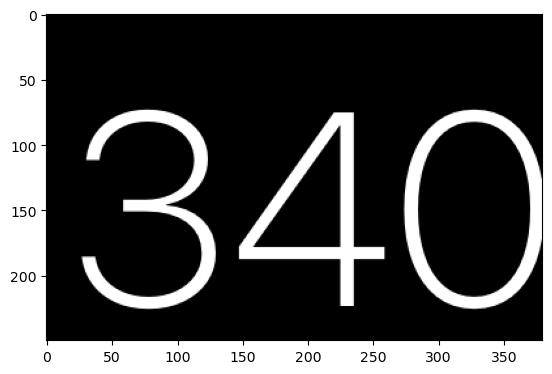

In [5]:
plt.imshow(gray[1850:2100, 200:580], cmap='gray')
plt.show()

In [6]:
gray = gray[1850:2100, 200:580]

In [7]:
import easyocr

reader = easyocr.Reader(['en'])

In [8]:
result = reader.readtext(gray)

In [9]:
for bbox, text, prob in result:
    print(f"Detected text: {text} with confidence {prob}")

Detected text: 340 with confidence 0.999995182215476


In [10]:
def extract_compass_degrees(image_path: str) -> str:
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray[1850:2100, 200:590]
    reader = easyocr.Reader(['en'])
    bbox, text, probability = reader.readtext(gray)[0]
    return text

In [12]:
reload = True

image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.PNG')]

if reload:
    # check if the file exists
    try:
        # if it does, load the data and find new files to process
        df = pd.read_csv('../data/processed/compass_degrees.csv')
        data = dict(zip(df['image_path'], df['degrees']))
        image_paths = [image_path for image_path in image_paths if image_path not in data.keys()]
    except:
        # if it doesn't, create an empty dictionary
        data = {}
    for image_path in tqdm(image_paths):
        degrees = extract_compass_degrees(image_path)
        data[image_path] = degrees
    df = pd.DataFrame(data.items(), columns=['image_path', 'degrees'])
    df.to_csv('../data/processed/compass_degrees.csv')
else:
    df = pd.read_csv('../data/processed/compass_degrees.csv')

0it [00:00, ?it/s]

In [15]:
df['degrees'] = df['degrees'].astype(str).str.strip("_").str.strip("C").astype(float)
df.to_csv('../data/processed/compass_degrees.csv')